In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Data file as variable
stroke_predictive_path = "data/healthcare-dataset-stroke-data.csv"

In [2]:
# Read .csv file
stroke_predictive_df = pd.read_csv(stroke_predictive_path)

# Display preview of data
stroke_predictive_df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
# Find number of individual participants
stroke_predictive_df["id"].nunique()
stroke_predictive_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# Change columns to all lower case to match
stroke_predictive_df = stroke_predictive_df.rename(columns=str.lower)
stroke_predictive_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
# Check of dublicate IDs
# None found
duplicate_check = stroke_predictive_df.drop_duplicates(subset=["id"])
print(len(duplicate_check))

5110


In [6]:
# Check if any columns should be dropped
# All look appropriate, but bmi has 111 fewer rows of data
stroke_predictive_df.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [7]:
# Drop rows with missing data so all match bmi's total
stroke_predictive = stroke_predictive_df.dropna(how='any')
stroke_predictive.count()

id                   4909
gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

In [8]:
# 895 subjects are minors 18 and under
# 574 subjects are children 12 and under
# 953 subjects are sections 65 and over

minor_check = stroke_predictive[stroke_predictive.age <= 18]
senior_check = stroke_predictive[stroke_predictive.age >= 65]
child_check = stroke_predictive[stroke_predictive.age <= 12]
print(minor_check["id"].nunique(), 
      child_check["id"].nunique(), 
      senior_check["id"].nunique())

895 574 953


In [9]:
# Unique entries for column work_type (5)
# Clean
stroke_predictive["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [10]:
# Unique entries for column ever_married (2)
# Clean
stroke_predictive["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
# Unique entries for column residence_type (2)
# Clean
stroke_predictive["residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [12]:
# Unique entries for column smoking_status (4)
# Clean
stroke_predictive["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

# Does higher age increase the risk of stroke?

In [21]:
#grouping data by age groups 
age_bins = [0 , 30 , 40 , 50 , 60, 70 , 80 , 90 ,  float("inf")]
age_labels = ["0-30" , "31-40" , "41-50" , "51-60" , "61-70" , "71-80" , "81-90" , "91+"]

In [22]:
#Creating a new colum for the age groups
stroke_predictive.loc[: ,"age_group"] = pd.cut(stroke_predictive["age"] , bins=age_bins , labels=age_labels , right=False )
#grouping data by age group
age_grouped = stroke_predictive.groupby("age_group")
# Finding the number of individuals in each age group
age_grouo_counts = age_grouped.size()
print(age_grouo_counts)

age_group
0-30     1483
31-40     631
41-50     705
51-60     805
61-70     590
71-80     513
81-90     182
91+         0
dtype: int64


C:\Users\bavth\AppData\Local\Temp\ipykernel_33148\246681643.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['61-70', '81-90', '41-50', '71-80', '81-90', ..., '0-30', '81-90', '31-40', '51-60', '41-50']
Length: 4909
Categories (8, object): ['0-30' < '31-40' < '41-50' < '51-60' < '61-70' < '71-80' < '81-90' < '91+']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  stroke_predictive.loc[: ,"age_group"] = pd.cut(stroke_predictive["age"] , bins=age_bins , labels=age_labels , right=False )
C:\Users\bavth\AppData\Local\Temp\ipykernel_33148\246681643.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = stroke_predictive.groupby("age_group")


C:\Users\bavth\AppData\Local\Temp\ipykernel_33148\1154474945.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_counts = stroke_predictive.groupby(["age_group" , "stroke"]).size().unstack(fill_value=0)


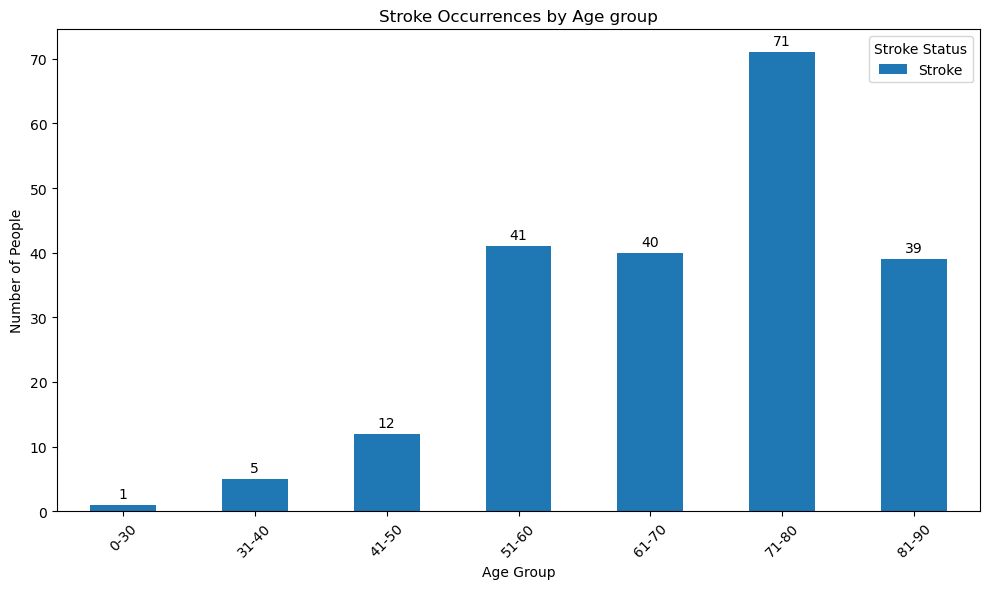

In [65]:
#Grouping by  stroke/no stroke for each age group
stroke_counts = stroke_predictive.groupby(["age_group" , "stroke"]).size().unstack(fill_value=0)

#Removing 91+ as no data for this catergory
filtered_stroke_counts = stroke_counts.drop("91+")

#filtering for only people who have had a stroke

filtered_stroke_counts2 = filtered_stroke_counts[[1]]

#creating a bar chart
bars_3 = filtered_stroke_counts2.plot(kind="bar", figsize=(10,6))
#titles and labels
plt.title("Stroke Occurrences by Age group")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.legend(["Stroke"] , title="Stroke Status")
plt.tight_layout()

#Adding the number of people ontop of each bar 
for bar in bars_3.containers:
    bars_3.bar_label(bar, fmt="%d" , padding= 3)

#Saving the chart
plt.savefig("data/Stroke Occurrences by Age group")
#show the chart
plt.show()
# remove no stroke


# Analysis:
The bar chart displays the stroke occurence between varying age groups. From age 51-60 we see an increase of 29 stroke occurrences when compared to the age group of 41-50. There is a gradual increase in stroke occurrences with a high of 71 in ages 71-80. This graph visually comfirms higher age does increase the risk of stroke occurrence.

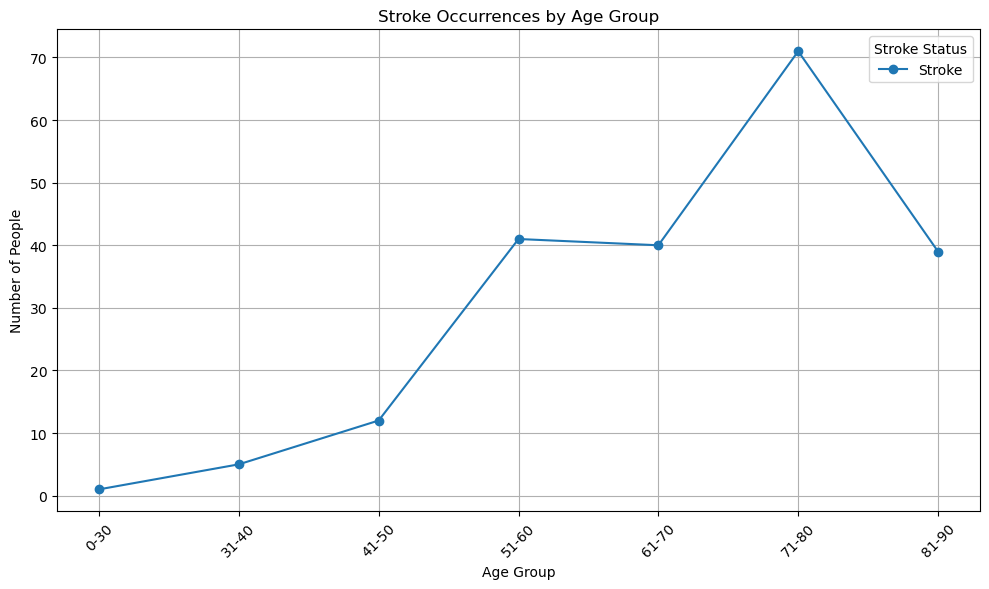

In [61]:
#Creating a line chart 
plt.figure(figsize=(10,6))
plt.plot(filtered_stroke_counts.index, filtered_stroke_counts[1] , marker="o" , label="Stroke")

#Adding titles , labels and grid
plt.title("Stroke Occurrences by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Stroke Status")
#Saving the chart
plt.savefig("data/Stroke Occurrences by Age group Line Chart")

#displaying the chart
plt.tight_layout()
plt.show()



# Analysis:
This line graph displays the stroke occurrences distributed by age group. Storke occurrences seem to increase significantly as people age , There is a sharp rise in strokes for people in the 51-60 age. The highest number of strokes occurs in the 71-80 age group.This suggests that older adults , particularly those in their 70s face the greatest risk.

In [29]:
# Calculating the probability of having a stroke for each age group

# Getting the number of people who had a stroke
total_stroke_count = stroke_predictive[stroke_predictive["stroke"] == 1].groupby("age_group")["stroke"].count()
#Total number of people in each age group
total_count = stroke_predictive.groupby("age_group")["stroke"].count()

# Calculating the probability of stroke in each age group
stroke_probabilities = total_stroke_count / total_count

print(stroke_probabilities)

age_group
0-30     0.000674
31-40    0.007924
41-50    0.017021
51-60    0.050932
61-70    0.067797
71-80    0.138402
81-90    0.214286
91+           NaN
Name: stroke, dtype: float64


C:\Users\bavth\AppData\Local\Temp\ipykernel_33148\3444565861.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_stroke_count = stroke_predictive[stroke_predictive["stroke"] == 1].groupby("age_group")["stroke"].count()
C:\Users\bavth\AppData\Local\Temp\ipykernel_33148\3444565861.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_count = stroke_predictive.groupby("age_group")["stroke"].count()


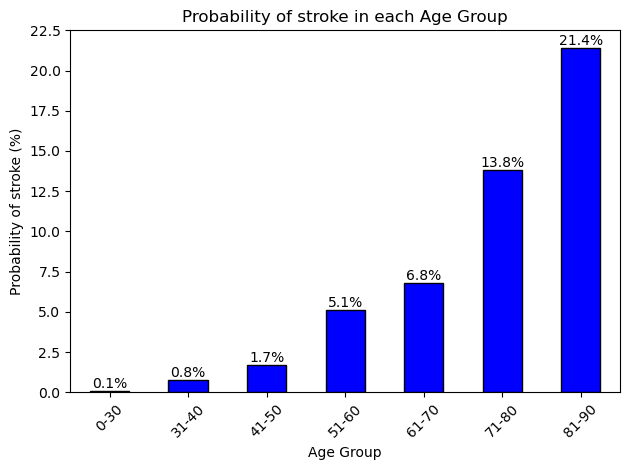

In [68]:
#creating a bar chart to display precentages 

# Removing the 91+ row and converting to precentages
stroke_probabilities_filtered = stroke_probabilities.drop("91+") * 100

bars = stroke_probabilities_filtered.plot(kind="bar" , color="blue" , edgecolor="black")

# adding labels and title
plt.title("Probability of stroke in each Age Group")
plt.xlabel("Age Group")
plt.ylabel("Probability of stroke (%)")
plt.xticks(rotation = 45)


#displaying the precentage values on top of each bar
for bar in bars.containers:
    bars.bar_label(bar, fmt="%.1f%%")

#Saving the chart
plt.savefig("data/Probability of stroke in each Age Group")

# Displaying the bar chart
plt.tight_layout()
plt.show()

# Analysis:
This bar chart illustrates the probability of stroke across diffrent age groups in percentages. We see a low probability in younger age groups and a gradual increase to middle age with a substantial rise in older age groups. From age 61 and onwards the probability begins to rise sharply with much higher risks seen in age groups 71-80 and 81-90. The highest stroke probability is found in the 81-90 age group but it is important to note  the population in this age group is lower compared to others.

# How do different types of work (Private, Self-employed, Govt_job, Never _worked) affect stroke risk?(Visualization 1)

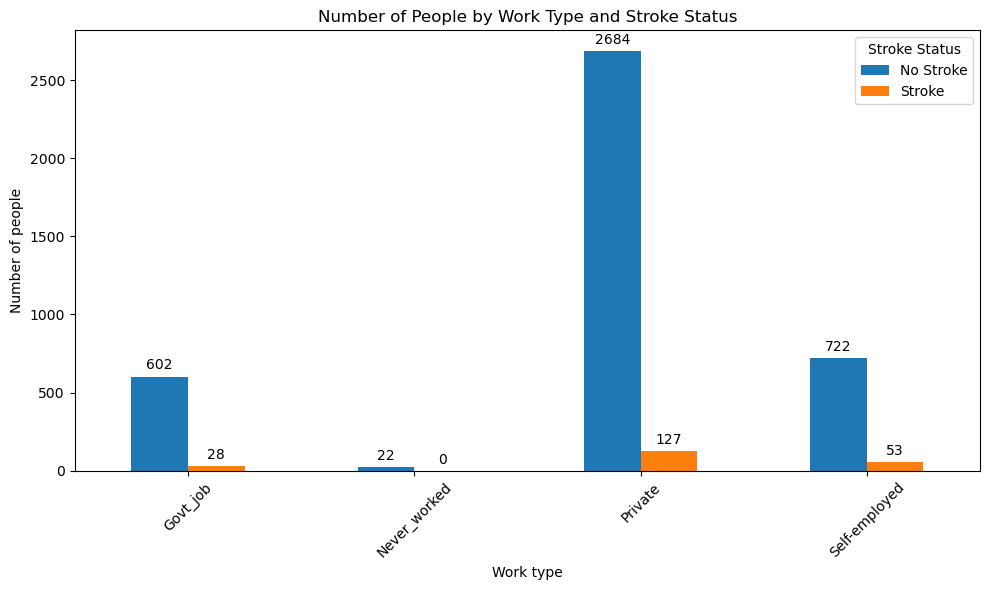

In [54]:
#Removing children from data

filtered_work_type = stroke_predictive[stroke_predictive["work_type"] != "children"]

#Group data by work type and stroke then count
work_type_count = filtered_work_type.groupby(["work_type" , "stroke"]).size().unstack(fill_value=0)

#Creating bar chart
bars_2 = work_type_count.plot(kind="bar" , figsize=(10 , 6))

#Adding labels and title
plt.title("Number of People by Work Type and Stroke Status")
plt.xlabel("Work type")
plt.ylabel("Number of people")
plt.xticks(rotation=45)
plt.legend(["No Stroke" , "Stroke"] , title= "Stroke Status")

#Adding the number of people ontop of each bar 
for bar in bars_2.containers:
    bars_2.bar_label(bar, fmt="%d" , padding= 3)

#Saving the chart
plt.savefig("data/Number of People by Work Type and Stroke Status")

#display the chart
plt.tight_layout()
plt.show()


# Analysis:
This bar graph shows the number of people in diffrent work types , categorized by stroke status. For goverment jobs , only 28 out of 628 had a stroke sugessting a relatively low stroke occurence amoung goverment employees but strokes still occur. For never worked , none experienced a stroke , this could be due to the limited sample size for this group. For private sector , 127 out of 2648 people had experienced a stoke , this group is the largest population but still indicates that it has a notable stroke occurence. For self employed , 53 out of 775 people have had a stroke sugessting that self employed individuals face unique risk factors related to stroke when compared to other work types.

# Does living in an urban or rural area affect stroke likelihood?(Visualization 1)

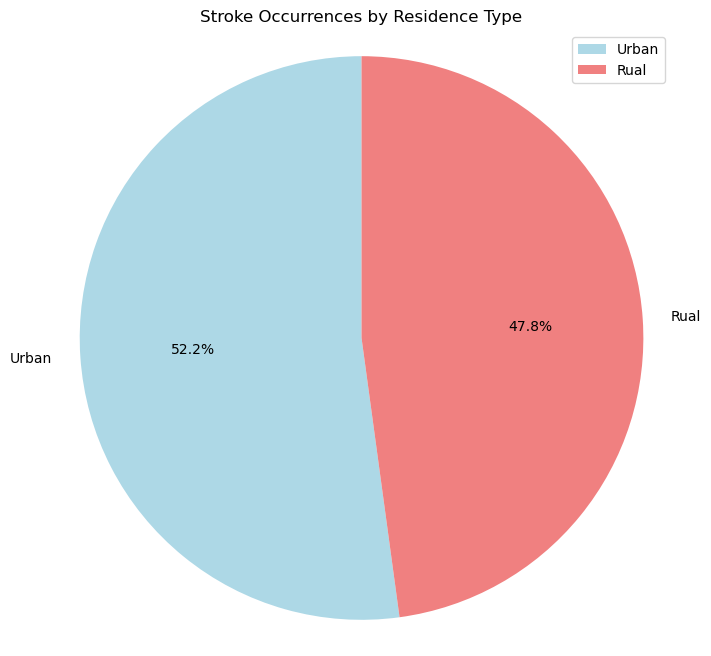

In [53]:
# Filtering data for people who have had a stroke
stroke_data = stroke_predictive[stroke_predictive["stroke"] == 1]

# grouping data by rual/urban and counting the number of strokes
residence_strokecount = stroke_data["residence_type"].value_counts()

#setting pie chart s,ize
plt.figure(figsize=(8,8))

#creating pie chart 
residence_strokecount.plot.pie(autopct= "%1.1f%%" , startangle = 90 , title = "Stroke Occurrences by Residence Type" , legend = True , colors = ["lightblue" , "lightcoral"] , labels = ["Urban" , "Rual"])

#Creating pie chart with equal axis
plt.axis("equal")
plt.ylabel("")

#Saving the chart
plt.savefig("data/Stroke Occurrences by Residence Type Pie Chart")

#output the pie chart
plt.show()


# Analysis:
This Pie chart displays the stroke occurrence between people living in urban and rual areas. Urban residence types have a slightly higher protion of stroke occurrences at 52.2% compared to rual residence types at 47.8%.The close distribution suggests that the occurrence of strokes is relatively balanced between urban and rual residence types.Potential reasons for the slight diffrece could be varying lifestyle factors , access to healthcare and enviromental conditions that are not captured in the dataset.